In [ ]:
!pip install kneed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Load the data from the Excel file
file_path = 'Bullying_2018_clean.xlsx'
data = pd.read_excel(file_path)

In [ ]:
# Use LabelEncoder for categorical columns and add them to the original dataframe
encoded_data = data.copy()
label_encoder = LabelEncoder()
encoded_data['Gender_encoded'] = label_encoder.fit_transform(data['Sex'])
encoded_data['Custom_Age_encoded'] = label_encoder.fit_transform(data['Custom_Age'])
encoded_data['Attacked_encoded'] = label_encoder.fit_transform(data['Physically_attacked'])
encoded_data['Most_of_the_time_or_always_felt_lonely'] = label_encoder.fit_transform(data['Most_of_the_time_or_always_felt_lonely'])
encoded_data['Bullied_on_school_property_in_past_12_months_encoded'] = label_encoder.fit_transform(data['Bullied_on_school_property_in_past_12_months'])
selected_columns = ['Gender_encoded', 'Custom_Age_encoded', 'Attacked_encoded', 'Most_of_the_time_or_always_felt_lonely', 'Bullied_on_school_property_in_past_12_months_encoded']
encoded_data = encoded_data[selected_columns]
record = encoded_data.copy()
# Display the updated dataframe
print(encoded_data.head())

   Gender_encoded  Custom_Age_encoded  Attacked_encoded  \
0               0                   2                 0   
1               1                   3                 0   
2               1                   5                 0   
3               0                   2                 0   
4               1                   2                 0   

   Most_of_the_time_or_always_felt_lonely  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Bullied_on_school_property_in_past_12_months_encoded  
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     


In [ ]:
from sklearn.preprocessing import normalize
data = pd.DataFrame( normalize(encoded_data), columns=encoded_data.columns)
data.head()

,Gender_encoded,Custom_Age_encoded,Attacked_encoded,Most_of_the_time_or_always_felt_lonely,Bullied_on_school_property_in_past_12_months_encoded
0,0.000000,1.000000,0.0,0.0,0.0
1,0.316228,0.948683,0.0,0.0,0.0
2,0.196116,0.980581,0.0,0.0,0.0
3,0.000000,1.000000,0.0,0.0,0.0
4,0.447214,0.894427,0.0,0.0,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

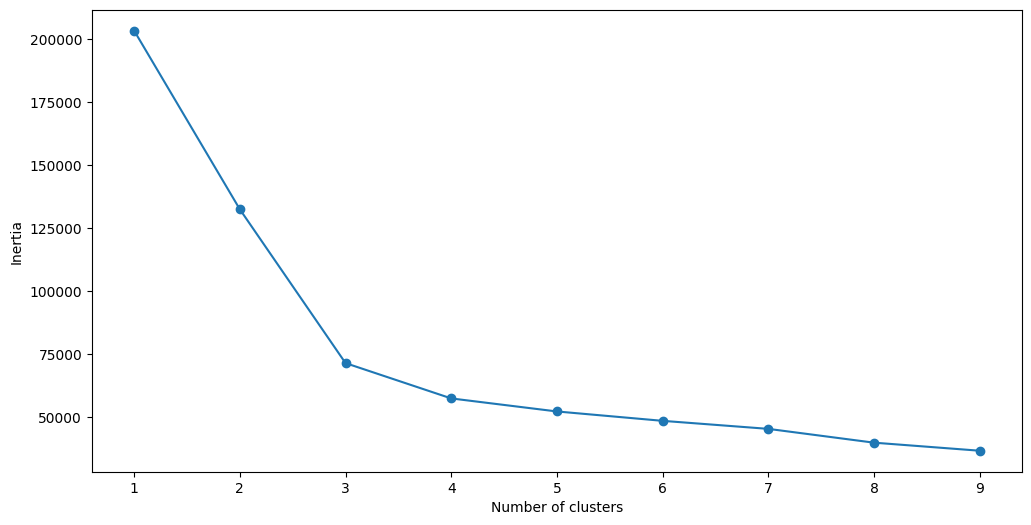

In [ ]:
# Search proper cluster number of k by investigating low saturated sum of square errors (SSE), figuring out how many clusters in the data using centrality.
SSE = []
for cluster in range(1,10):
  kmeans = KMeans( n_clusters = cluster, init='k-means++')
  kmeans.fit(encoded_data)
  SSE.append(kmeans.inertia_)
# Loop per cluusterfind the Sum of Squared Errors
# Plot SSE and find number of clusters k when SSE starts to saturate
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, ..., 1, 0, 0], dtype=int32)

Text(0, 0.5, 'Felt Lonely')

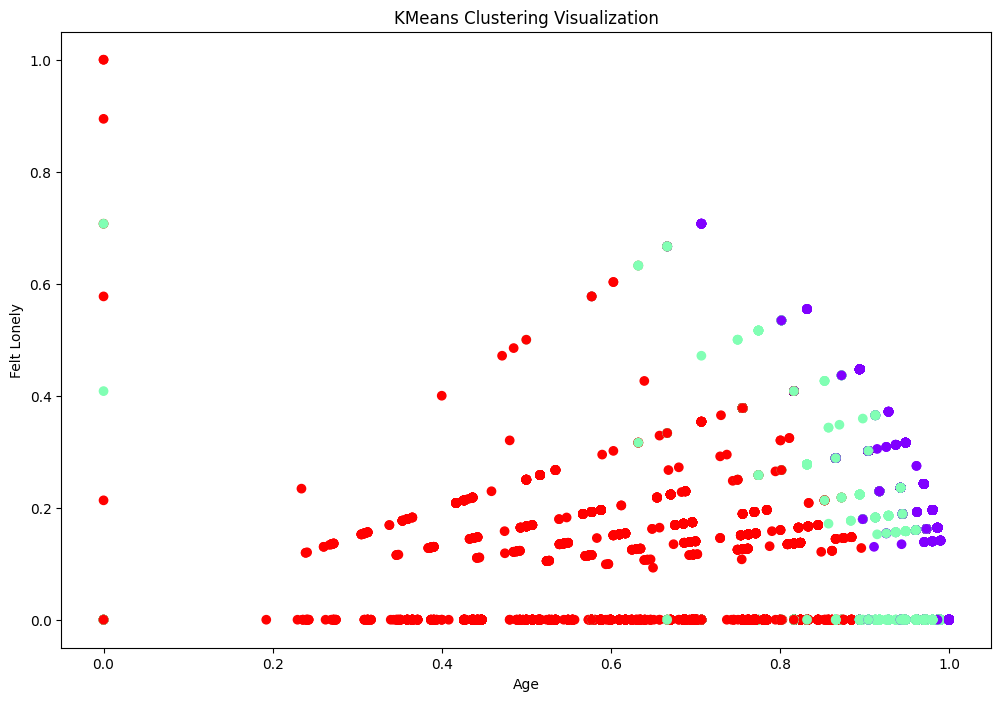

In [ ]:
plt.figure(figsize=(12,8))

#plt.scatter(data["Gender_encoded"],data["Custom_Age_encoded"],data["Attacked_encoded"],data["Fighting_encoded"],data["Bullied_on_school_property_in_past_12_months_encoded"])
plt.scatter(data["Custom_Age_encoded"],data["Most_of_the_time_or_always_felt_lonely"], c=kmeans.labels_, cmap='rainbow')
plt.title('KMeans Clustering Visualization')
plt.xlabel('Age')
plt.ylabel('Felt Lonely')


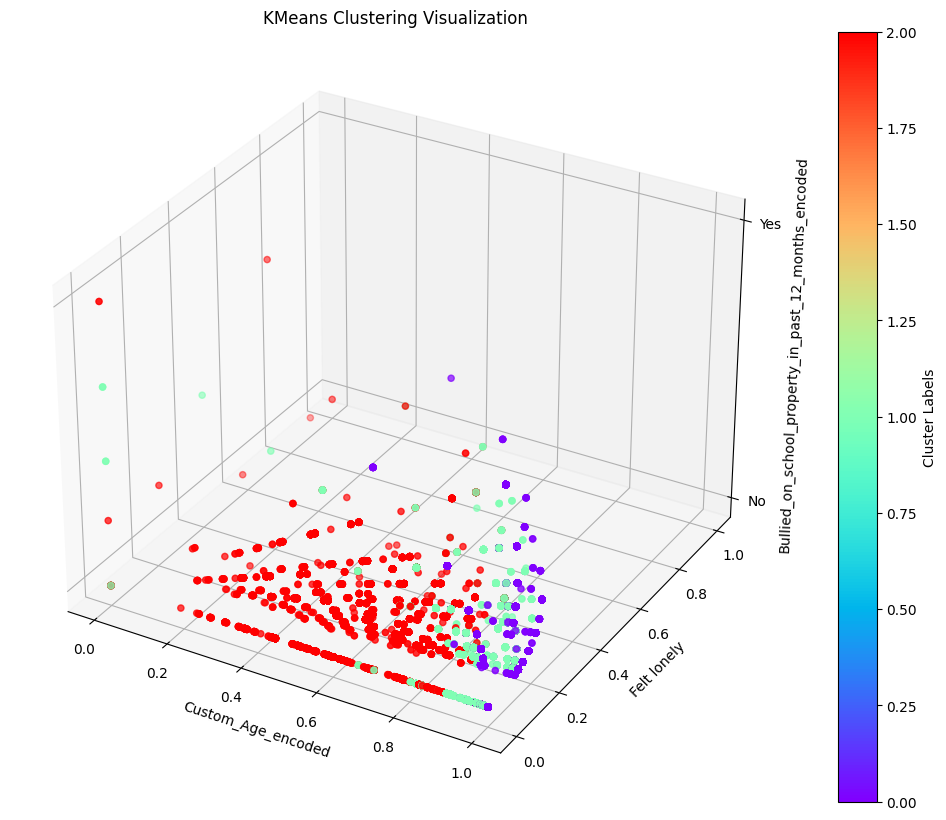

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    data["Custom_Age_encoded"],
    data["Most_of_the_time_or_always_felt_lonely"],
    data["Bullied_on_school_property_in_past_12_months_encoded"],
    c=kmeans.labels_,
    cmap='rainbow'
)
# Set custom Z-axis tick labels
ax.set_zticks([0, 1])
ax.set_zticklabels(['No', 'Yes'])

ax.set_title('KMeans Clustering Visualization')
ax.set_xlabel('Custom_Age_encoded')
ax.set_ylabel('Felt lonely')
ax.set_zlabel('Bullied_on_school_property_in_past_12_months_encoded')
fig.colorbar(scatter, ax=ax, label='Cluster Labels')
plt.show()

In [ ]:
# Select features for clustering
features_for_clustering = ['Custom_Age_encoded', 'Attacked_encoded', 'Fighting_encoded']

# Create and fit KMeans model
encoded_data['Cluster_Labels'] = kmeans.fit_predict(encoded_data[features_for_clustering])

# Create a new DataFrame with the desired columns
cluster_results = pd.DataFrame({
    'Custom_Age_encoded': encoded_data['Custom_Age_encoded'],
    'Attacked_encoded': encoded_data['Attacked_encoded'],
    'Most_of_the_time_or_always_felt_lonely': encoded_data['Most_of_the_time_or_always_felt_lonely'],
    'Cluster_Labels': encoded_data['Cluster_Labels']
})

# Save the clustering results to a CSV file
cluster_results.to_csv('clustering_results.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Silhouette score of this model which is  how similar each data point in one cluster is to the other points in the same cluster compared to points in other clusters.
print(silhouette_score(encoded_data, kmeans.labels_, metric='euclidean'))

0.5125918938014145


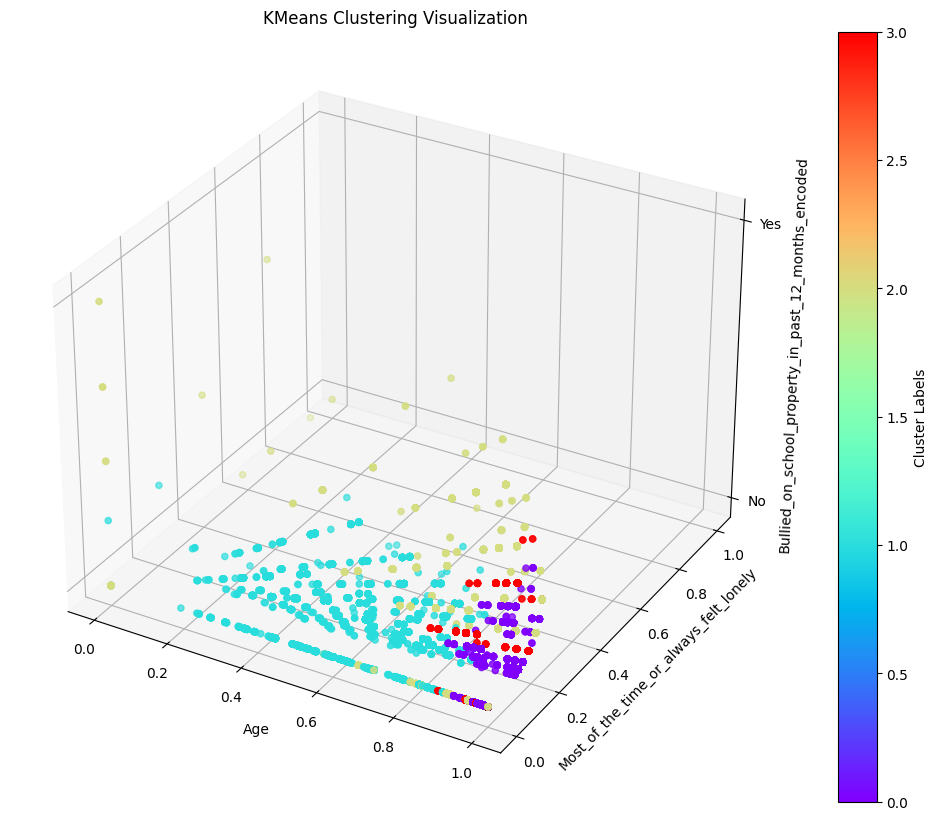

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    data["Custom_Age_encoded"],
    data["Most_of_the_time_or_always_felt_lonely"],
    data["Bullied_on_school_property_in_past_12_months_encoded"],
    c=kmeans.labels_,
    cmap='rainbow'
)
# Set custom Z-axis tick labels
ax.set_zticks([0, 1])
ax.set_zticklabels(['No', 'Yes'])

ax.set_title('KMeans Clustering Visualization')
ax.set_xlabel('Age')
ax.set_ylabel('Most_of_the_time_or_always_felt_lonely')
ax.set_zlabel('Bullied_on_school_property_in_past_12_months_encoded')
fig.colorbar(scatter, ax=ax, label='Cluster Labels')

In [ ]:
# Get the coordinates of the centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame for centroids
centroids_df = pd.DataFrame(centroids)

# Display the table of centroids
print("Table of Centroids:")
print(centroids_df)

Table of Centroids:
          0         1         2         3         4
0  0.118602  0.968358  0.016958  0.024707  0.050372
1  0.147438  0.660709  0.048155  0.668379  0.045999
2  0.103978  0.630943  0.629644  0.208753  0.080855
